In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D,Input

2023-06-16 21:56:54.813272: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-16 21:56:55.037790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
ds_dir = "archive/UTKFace/"

In [3]:
image_paths = []
age_labels = []
gender_labels = []

In [4]:
for filename in tqdm(os.listdir(ds_dir)):
    image_path = os.path.join(ds_dir,filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame()
df["image"],df["age"],df["gender"] = image_paths,age_labels,gender_labels
df.tail(10)

image  age  gender
23698  archive/UTKFace/80_0_0_20170111210128898.jpg.c...   80       0
23699  archive/UTKFace/2_1_3_20161219225917512.jpg.ch...    2       1
23700  archive/UTKFace/47_1_0_20170104235823851.jpg.c...   47       1
23701  archive/UTKFace/1_0_1_20170110213656556.jpg.ch...    1       0
23702  archive/UTKFace/26_0_0_20170119180222692.jpg.c...   26       0
23703  archive/UTKFace/26_1_4_20170117201058830.jpg.c...   26       1
23704  archive/UTKFace/28_0_1_20170113151542431.jpg.c...   28       0
23705  archive/UTKFace/2_1_0_20170109191752762.jpg.ch...    2       1
23706  archive/UTKFace/55_1_0_20170117143101420.jpg.c...   55       1
23707  archive/UTKFace/52_0_0_20170104205512484.jpg.c...   52       0

In [6]:
gender_dict = {0:"Male",1:"Female"}

In [7]:
from PIL import Image

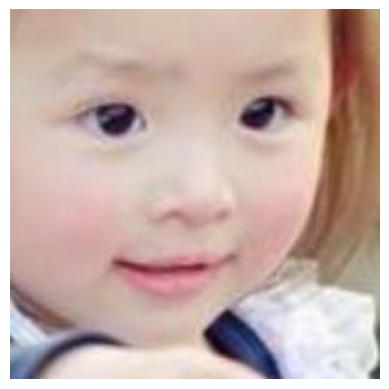

In [8]:
img = Image.open(df["image"][0])
plt.axis("off")
plt.imshow(img);

/tmp/ipykernel_9955/316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

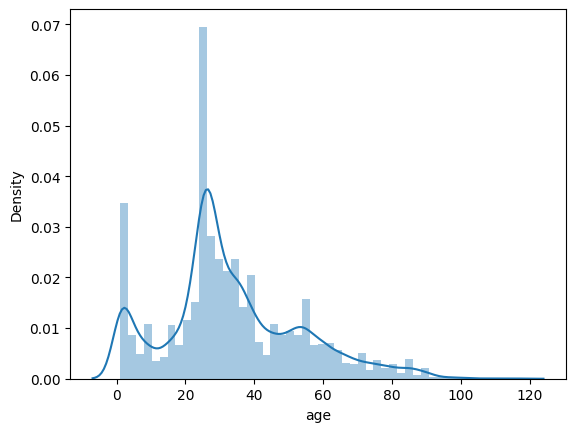

In [9]:
sns.distplot(df["age"])

<Axes: xlabel='gender', ylabel='count'>

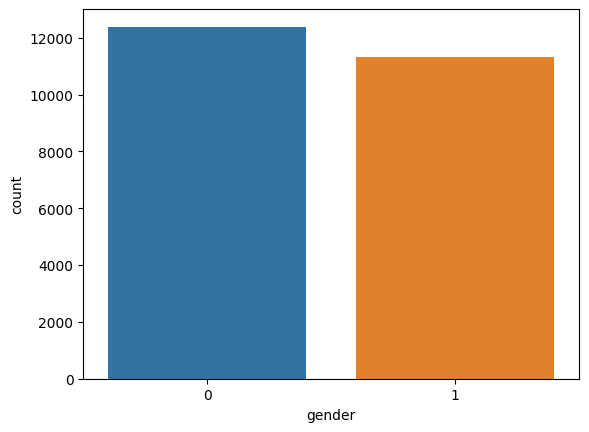

In [10]:
sns.countplot(x ='gender', data = df)

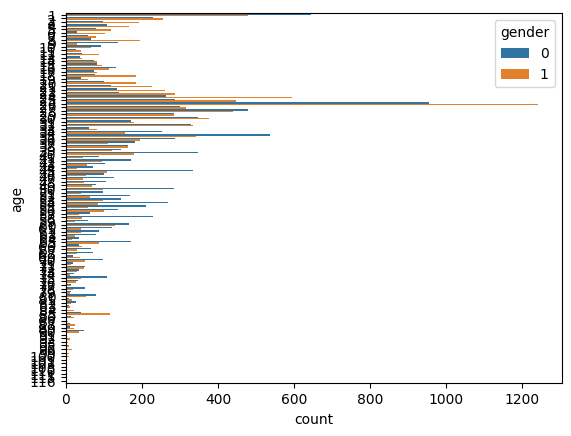

In [11]:
sns.countplot(y ='age', hue = "gender", data = df);

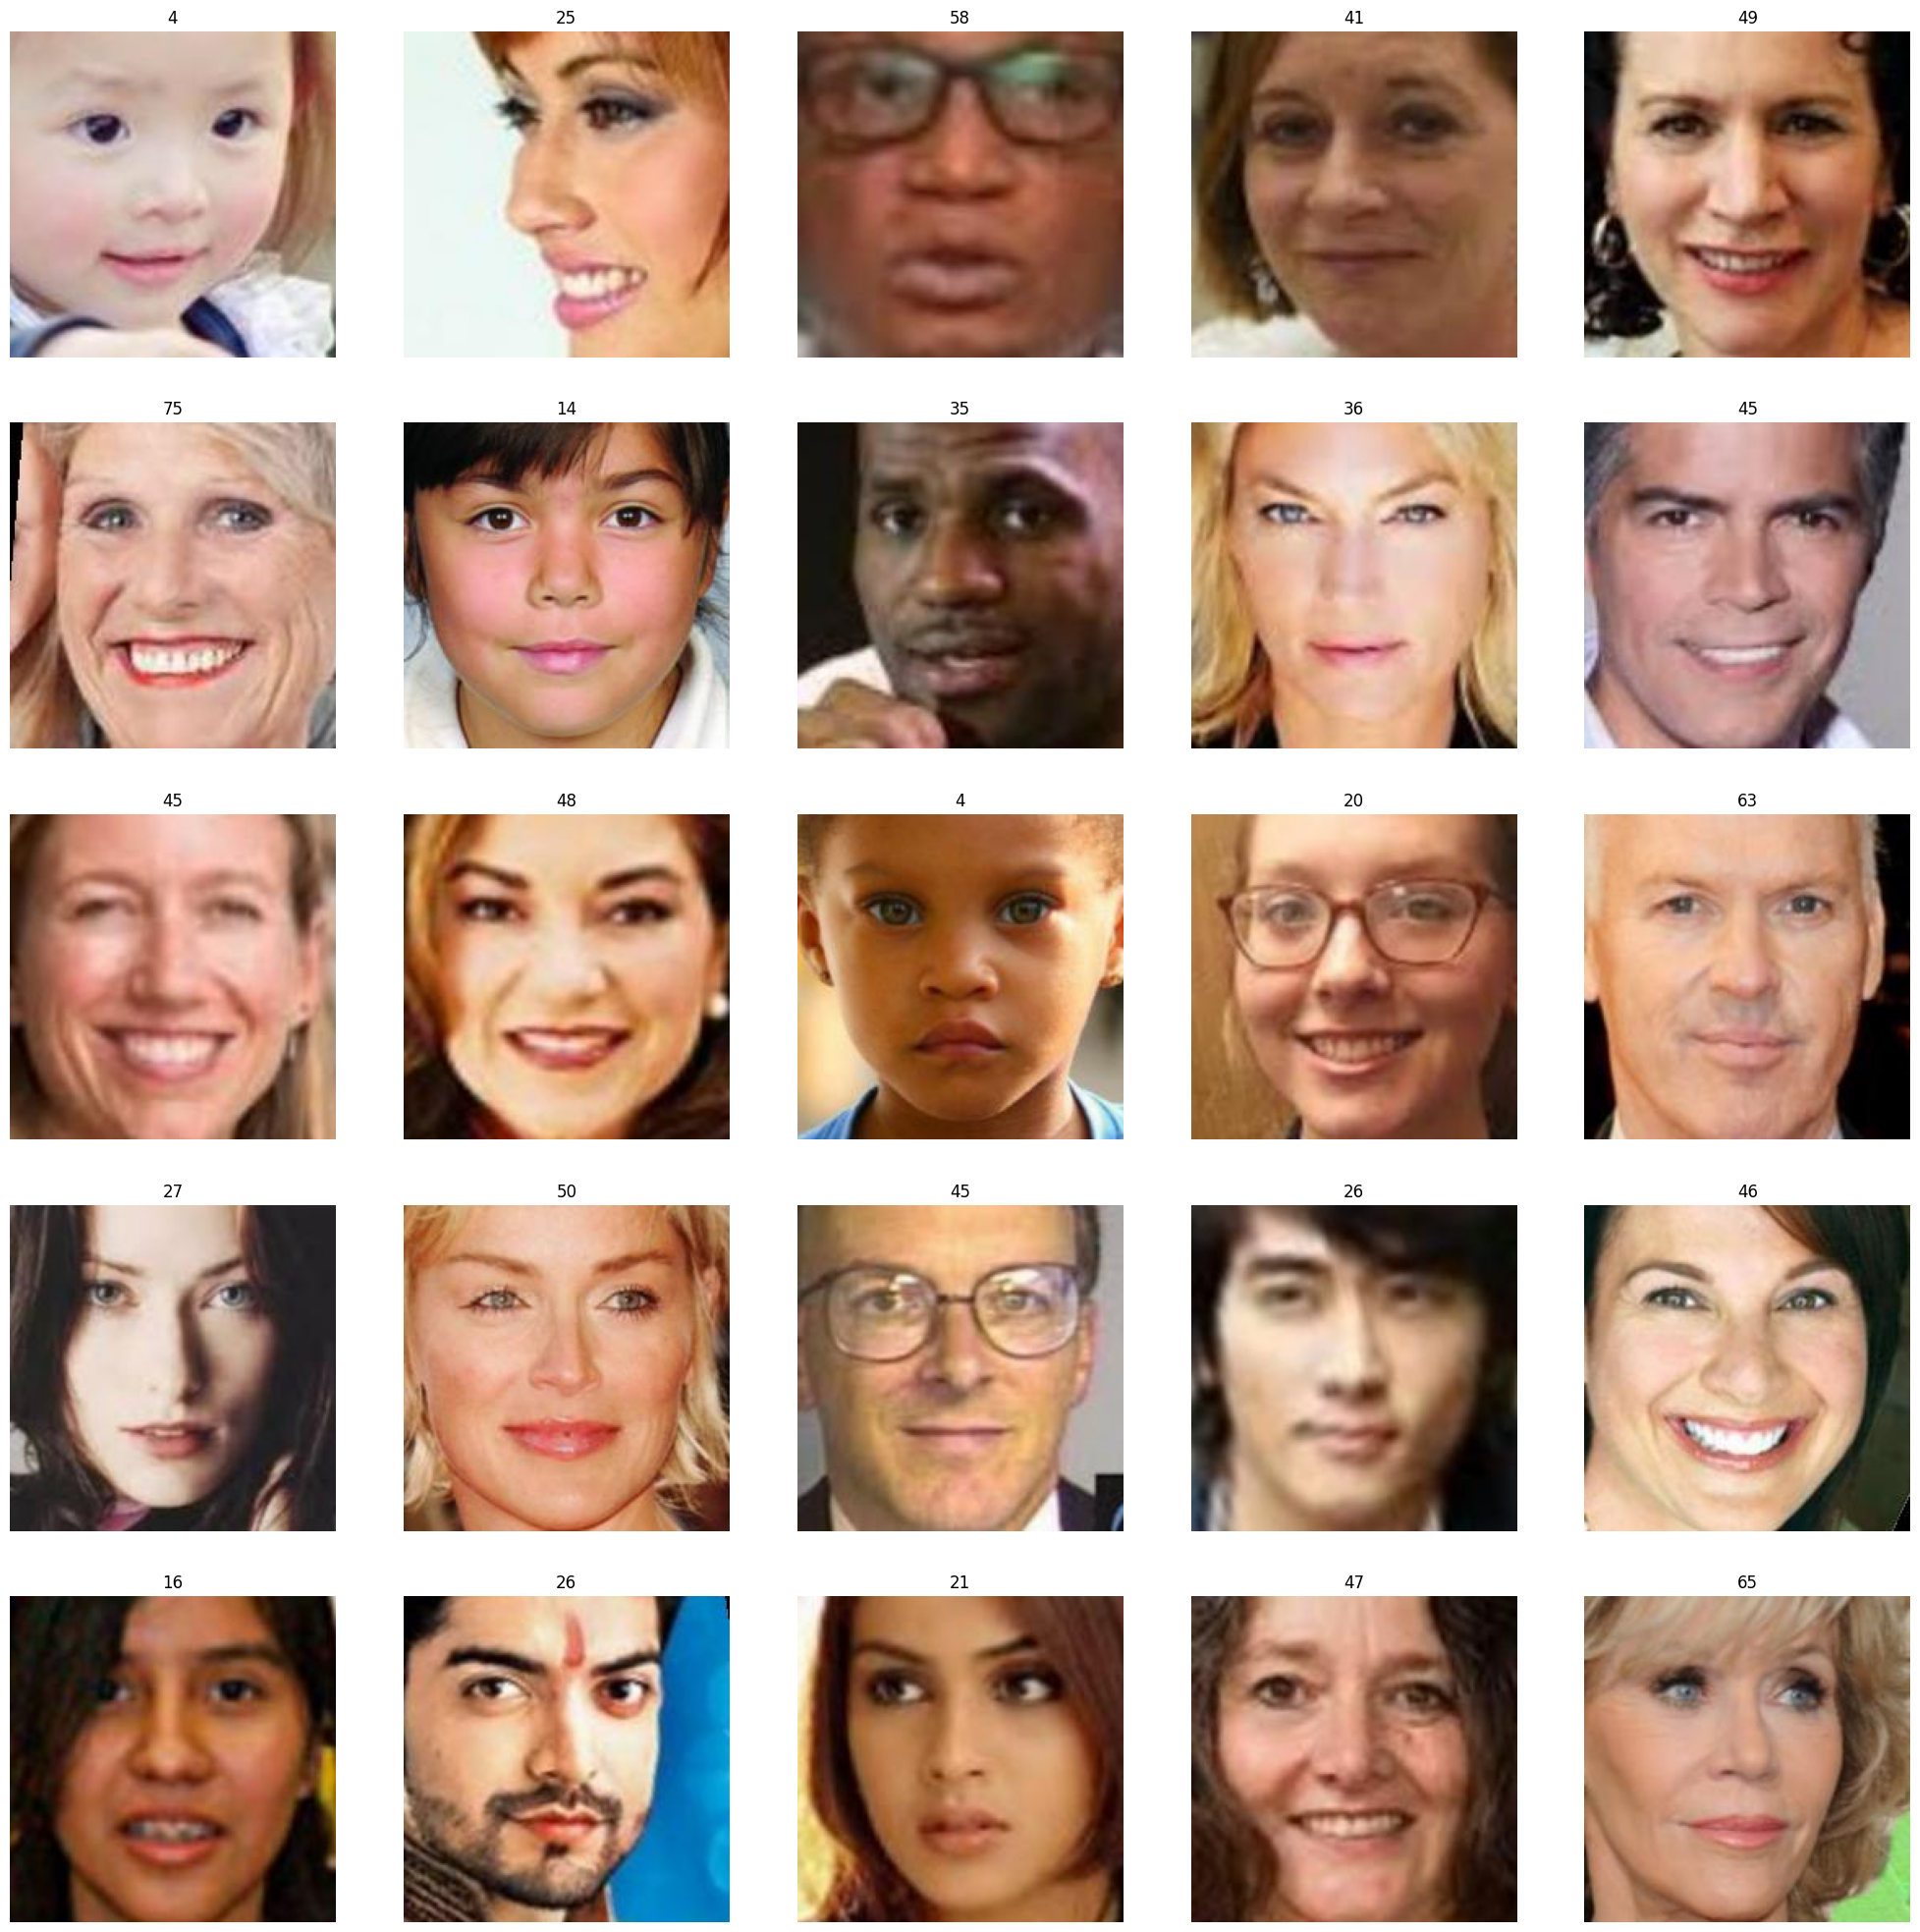

In [12]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25]
for index,fil,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(fil)
    img = np.array(img)
    plt.imshow(img)
    plt.axis("off")
    plt.title(age)


In [13]:
def extrat_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = img.resize((128,128),Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [14]:
x = extrat_features(df["image"])

  0%|          | 0/23708 [00:00<?, ?it/s]

/home/hari/.local/lib/python3.10/site-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [15]:
x.shape

(23708, 128, 128, 1)

In [16]:
x = x/225.0  

In [17]:
y_gender = np.array(df["gender"])
y_age = np.array(df["age"])

In [18]:
input_shape = (128,128,1)

In [19]:
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D,Input

inputs = Input(input_shape)

con_1 = Conv2D(32,kernel_size=(3,3),activation="relu") (inputs)
maxp_1 = MaxPool2D(pool_size=(2,2)) (con_1)

con_2 = Conv2D(64,kernel_size=(3,3),activation="relu") (maxp_1)
maxp_2 = MaxPool2D(pool_size=(2,2)) (con_2)

con_3 = Conv2D(128,kernel_size=(3,3),activation="relu") (maxp_2)
maxp_3 = MaxPool2D(pool_size=(2,2)) (con_3)

con_4 = Conv2D(256,kernel_size=(3,3),activation="relu") (maxp_3)
maxp_4 = MaxPool2D(pool_size=(2,2)) (con_4)

flatten = Flatten() (maxp_4)

dense_1 = Dense(256,activation="relu") (flatten)
dense_2 = Dense(256,activation="relu") (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1,activation='sigmoid',name = "gender_out") (dropout_1)
output_2 = Dense(1,activation='sigmoid',name = "age_out") (dropout_2)

model = Model(inputs = [inputs],outputs = [output_1,output_2])
model.compile(loss = ["binary_crossentropy","mae"],optimizer="adam",metrics=["accuracy"])

In [3]:
model.summary()

NameError: name 'model' is not defined

In [21]:
history = model.fit(x = x,y = [y_gender,y_age],batch_size=32,epochs = 30,validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 433s 728ms/step - loss: 32.8085 - gender_out_loss: 0.4687 - age_out_loss: 32.3398 - gender_out_accuracy: 0.7690 - age_out_accuracy: 0.0477 - val_loss: 32.5322 - val_gender_out_loss: 0.3683 - val_age_out_loss: 32.1639 - val_gender_out_accuracy: 0.8321 - val_age_out_accuracy: 0.0458
Epoch 2/30
593/593 [==============================] - 147s 248ms/step - loss: 32.6648 - gender_out_loss: 0.3264 - age_out_loss: 32.3384 - gender_out_accuracy: 0.8566 - age_out_accuracy: 0.0478 - val_loss: 32.4678 - val_gender_out_loss: 0.3040 - val_age_out_loss: 32.1639 - val_gender_out_accuracy: 0.8615 - val_age_out_accuracy: 0.0458
Epoch 3/30
593/593 [==============================] - 147s 247ms/step - loss: 32.6190 - gender_out_loss: 0.2806 - age_out_loss: 32.3384 - gender_out_accuracy: 0.8769 - age_out_accuracy: 0.0478 - val_loss: 32.4443 - val_gender_out_loss: 0.2804 - val_age_out_loss: 32.1639 - val_gender_out_accuracy: 0.8775 - val_age_out_accuracy:

In [1]:
import pickle

In [2]:
pickle.dump(model,open("model_age.pkl","wb"))

NameError: name 'model' is not defined